### DA Question 1: Rider Behavior Analysis

Import all necessary packages.

In [91]:
# Apache parquet files (to save space)
import pyarrow as pa
import pyarrow.parquet as pq

# Dataframes and numerical
import pandas as pd
import numpy as np

# Increase pandas default display 
pd.options.display.max_rows = 250
pd.options.display.max_columns = 250

# Suppress scientific notation of data in pandas
pd.set_option('display.float_format', '{:.2f}'.format)

# Graphing
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, StrMethodFormatter
%matplotlib inline
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')

# # For creating Sankey diagrams using plotly
# import json, urllib
# import chart_studio.plotly as py

# For creating Sankey diagrams using holoviews
import holoviews as hv
# import plotly.graph_objects as go
# import plotly.express as pex

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

Load **.parquet** file of all CitiBike rides from May 2021 through April 2022 into **pandas** dataframe.

In [2]:
CB_Data = pq.read_table('data/202105-202204-citibike-tripdata.parquet').to_pandas()

Understand the structure of the dataframe.

In [3]:
CB_Data.head()

,member_casual,rideable_type,started_at,start_station_name,start_lat,start_lng,start_boro,start_hood,ended_at,end_station_name,end_lat,end_lng,end_boro,end_hood,year,month,week_of_year,day_of_week,hour_of_day,duration_min,distance_mi,speed_mph
1,Member,Classic Bike,2021-05-13 12:48:08,Broadway & W 25 St,40.74,-73.99,Manhattan,Flatiron District,2021-05-13 13:07:37,E 2 St & Avenue B,40.72,-73.98,Manhattan,East Village,2021,5,19,3,12,19.48,1.81,5.57
2,Member,Classic Bike,2021-05-16 08:30:13,46 Ave & 5 St,40.75,-73.95,Queens,Hunters Point,2021-05-16 08:45:47,34th Ave & Vernon Blvd,40.77,-73.94,Queens,Astoria,2021,5,19,6,8,15.57,2.26,8.69
3,Member,Classic Bike,2021-05-01 08:38:14,46 Ave & 5 St,40.75,-73.95,Queens,Hunters Point,2021-05-01 08:54:27,34th Ave & Vernon Blvd,40.77,-73.94,Queens,Astoria,2021,5,17,5,8,16.22,2.26,8.35
4,Member,Classic Bike,2021-05-09 08:12:31,46 Ave & 5 St,40.75,-73.95,Queens,Hunters Point,2021-05-09 08:27:05,34th Ave & Vernon Blvd,40.77,-73.94,Queens,Astoria,2021,5,18,6,8,14.57,2.26,9.29
5,Member,Classic Bike,2021-05-27 07:52:27,E 123 St & Lexington Ave,40.80,-73.94,Manhattan,East Harlem,2021-05-27 08:09:01,1 Ave & E 78 St,40.77,-73.95,Manhattan,Upper East Side,2021,5,21,3,7,16.57,3.25,11.78


In [4]:
CB_Data.shape

(27143436, 22)

In [5]:
CB_Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27143436 entries, 1 to 28816547
Data columns (total 22 columns):
 #   Column              Dtype         
---  ------              -----         
 0   member_casual       object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   start_station_name  object        
 4   start_lat           float64       
 5   start_lng           float64       
 6   start_boro          object        
 7   start_hood          object        
 8   ended_at            datetime64[ns]
 9   end_station_name    object        
 10  end_lat             float64       
 11  end_lng             float64       
 12  end_boro            object        
 13  end_hood            object        
 14  year                int64         
 15  month               int64         
 16  week_of_year        int64         
 17  day_of_week         int64         
 18  hour_of_day         int64         
 19  duration_min        float64       
 20  

In [6]:
CB_Data.dtypes

member_casual                 object
rideable_type                 object
started_at            datetime64[ns]
start_station_name            object
start_lat                    float64
start_lng                    float64
start_boro                    object
start_hood                    object
ended_at              datetime64[ns]
end_station_name              object
end_lat                      float64
end_lng                      float64
end_boro                      object
end_hood                      object
year                           int64
month                          int64
week_of_year                   int64
day_of_week                    int64
hour_of_day                    int64
duration_min                 float64
distance_mi                  float64
speed_mph                    float64
dtype: object

**What are the purposes of the rides? Hypothesize based on common sense. Estimate the proportions of rides which are riders commuting for work.**

Investigate which days of the week and which hours of the day the rides tend to be distributed. Create a dataframe which focuses on this information, taking into account whether the ride was casual or by a member as well as the neighborhoods that were traversed between.

In [7]:
cols_ride_time = ['member_casual', 'start_hood', 'end_hood', 'month', 'week_of_year', 'day_of_week', 'hour_of_day']
CB_Ride_Time = CB_Data[cols_ride_time]

In [8]:
CB_Ride_Time

,member_casual,start_hood,end_hood,month,week_of_year,day_of_week,hour_of_day
1,Member,Flatiron District,East Village,5,19,3,12
2,Member,Hunters Point,Astoria,5,19,6,8
3,Member,Hunters Point,Astoria,5,17,5,8
4,Member,Hunters Point,Astoria,5,18,6,8
5,Member,East Harlem,Upper East Side,5,21,3,7
...,...,...,...,...,...,...,...
28816543,Member,Lower East Side,Chelsea,4,16,4,13
28816544,Member,Hamilton Heights,Mott Haven,4,15,2,17
28816545,Member,Upper East Side,Upper East Side,4,15,1,15
28816546,Member,Midtown,Upper East Side,4,17,3,15


In [9]:
CB_Ride_Time.describe()

,month,week_of_year,day_of_week,hour_of_day
count,27143436.00,27143436.00,27143436.00,27143436.00
mean,7.03,28.45,2.97,14.04
std,2.98,12.91,1.95,5.02
min,1.00,1.00,0.00,0.00
25%,5.00,19.00,1.00,11.00
50%,7.00,29.00,3.00,15.00
75%,9.00,39.00,5.00,18.00
max,12.00,52.00,6.00,23.00


As in **pandas**, 0 represents Monday in the notation system for day of the week, the mean for rides throughout the week seems to be on Thursday with Tuesday and Saturday representing the lower and higher ends of the standard deviation respectively.

Likewise, the average ride is taken at 3 pm, with 11 am and 6 pm being the lower and higher ends of the standard deviation.

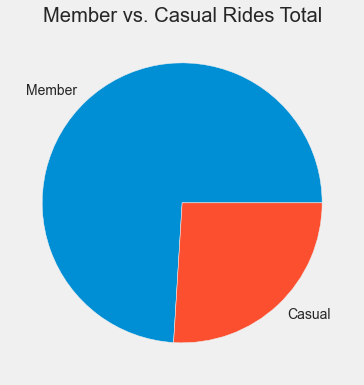

In [10]:
plt.figure(figsize=(6,6))
plt.pie(CB_Ride_Time.member_casual.value_counts(), labels = CB_Ride_Time.member_casual.unique())
plt.title('Member vs. Casual Rides Total')
plt.show()

Since only a quarter of the rides are from casual riders, majority of the rides taken are most likely from residents rather than tourists of the city.

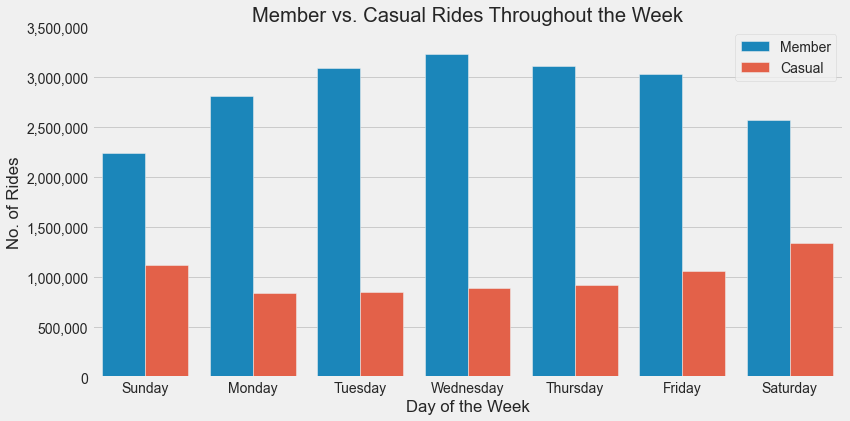

In [11]:
# Creating seaborn countplot
plt.figure(figsize=(12,6))
g = sns.countplot(x = 'day_of_week', data = CB_Ride_Time, order = [6,0,1,2,3,4,5], hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,4000000,500000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Week')
plt.xlabel('Day of the Week')
plt.ylabel('No. of Rides')
plt.show()

Ridership is far higher among members during the weekday than the weekends, whereas the opposite is true for the casual rides. Therefore, it seems that most members may commuters and most casual riders may be tourists.

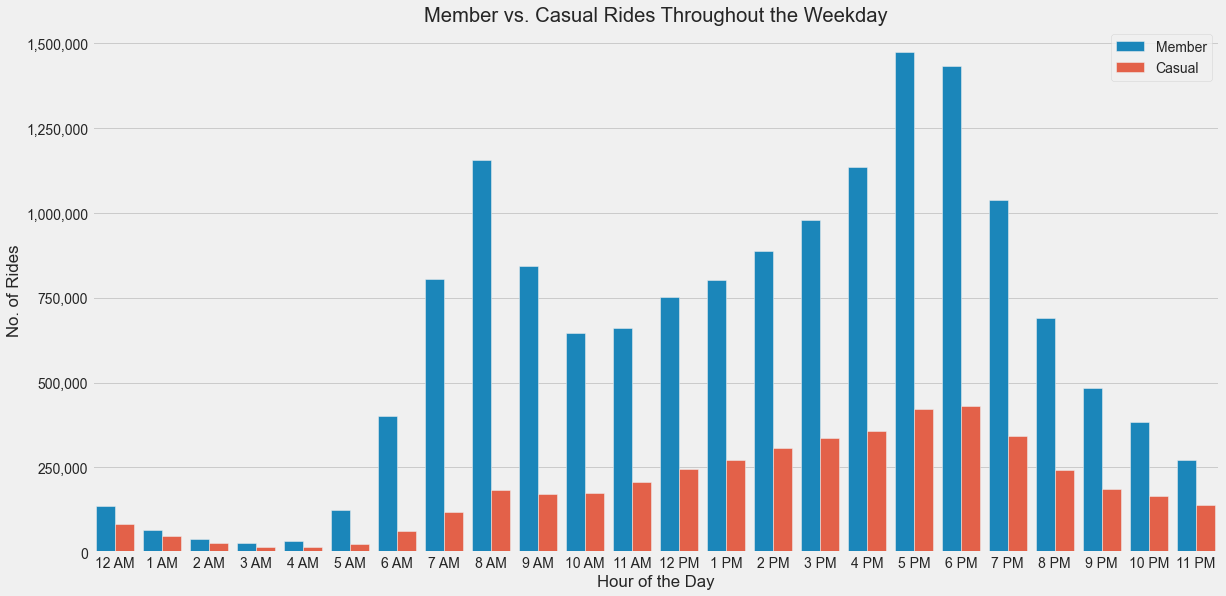

In [12]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.countplot(x = CB_Ride_Time.hour_of_day.loc[CB_Ride_Time.day_of_week < 5], 
                  data = CB_Ride_Time, hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,1750000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                   '12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Weekday')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Rides')
plt.show()

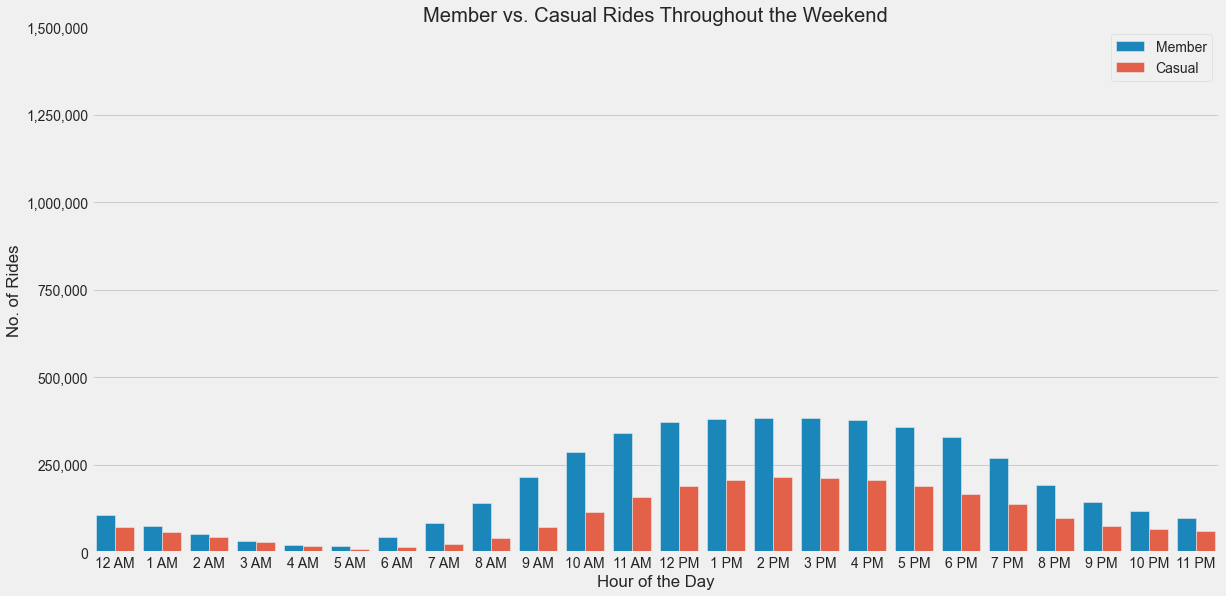

In [13]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.countplot(x = CB_Ride_Time.hour_of_day.loc[CB_Ride_Time.day_of_week >= 5], 
                  data = CB_Ride_Time, hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,1750000,250000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['12 AM','1 AM','2 AM','3 AM','4 AM','5 AM','6 AM', '7 AM', '8 AM', '9 AM', '10 AM', '11 AM',
                   '12 PM','1 PM','2 PM','3 PM','4 PM','5 PM','6 PM', '7 PM', '8 PM', '9 PM', '10 PM', '11 PM'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Weekend')
plt.xlabel('Hour of the Day')
plt.ylabel('No. of Rides')
plt.show()

**Analyze the variations of ride-counts with respect to months. What seasonality do you observe? What is the likely reason for the seasonality?**

First, demonstrate month-by-month.

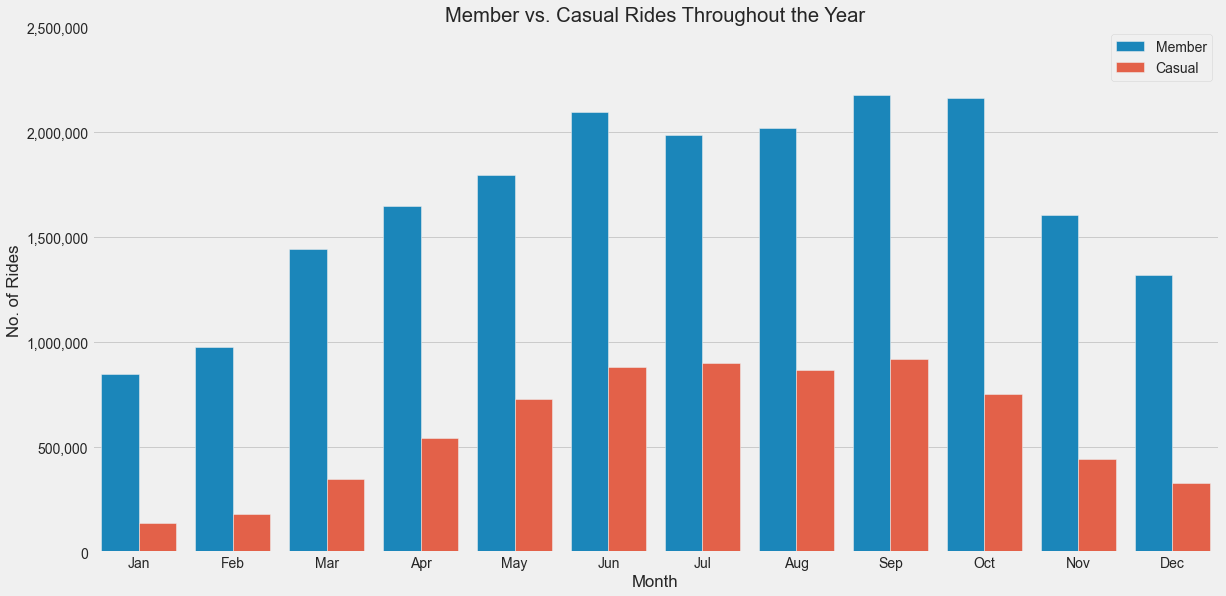

In [14]:
# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.countplot(x = CB_Ride_Time.month, 
                  data = CB_Ride_Time, hue = 'member_casual')

# Plot formatting
g.set_yticks(list(range(0,3000000,500000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                   'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Year')
plt.xlabel('Month')
plt.ylabel('No. of Rides')
plt.show()

Next, investigate the data week-by-week.

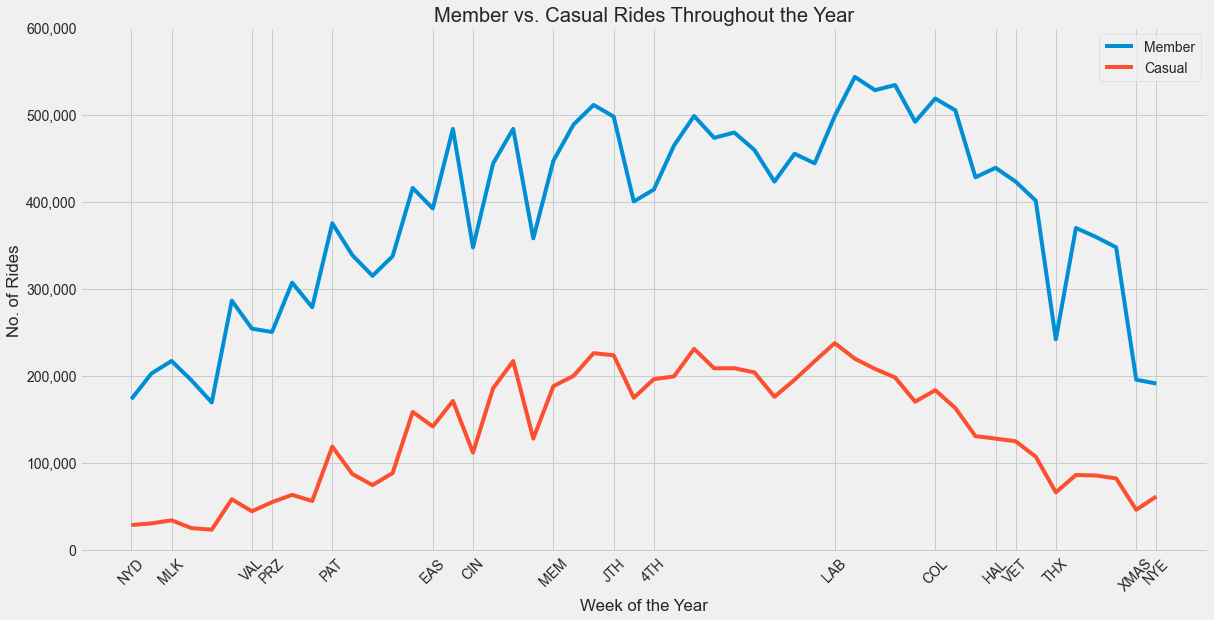

In [15]:
# Creating new dataframe to decrease computational load
viz = pd.DataFrame(CB_Ride_Time.groupby('week_of_year')['member_casual'].value_counts())
viz = viz.reset_index("week_of_year").rename(columns = {"member_casual":"num_riders"}).reset_index()

# Creating seaborn countplot
plt.figure(figsize=(18,9))
g = sns.lineplot(x = 'week_of_year', y = 'num_riders', data = viz, hue = 'member_casual', sort=True)

# Plot formatting
g.set_yticks(list(range(0,700000,100000)))
g.yaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
g.set_xticks([1,3,7,8,11,16,18,22,25,27,36,41,44,45,47,51,52])
g.set_xticklabels(['NYD', 'MLK', 'VAL', 'PRZ', 'PAT', 'EAS', 'CIN',
                   'MEM', 'JTH', '4TH', 'LAB', 'COL', 'HAL', 'VET', 'THX', 'XMAS', 'NYE'],
                 rotation = 45)
plt.legend(prop={'size': 14})
plt.title('Member vs. Casual Rides Throughout the Year')
plt.xlabel('Week of the Year')
plt.ylabel('No. of Rides')
plt.show()

**During the rush hours, what are the hot-spots (popular dock-stations) for trip initialization/destination?**

Create another dataframe focusing on locations of the most popular dock-stations based on day and time of week

In [16]:
cols_ride_place = ['start_station_name', 'start_boro', 'start_hood',
                  'end_station_name', 'end_boro', 'end_hood',
                  'member_casual', 'day_of_week', 'hour_of_day']
CB_Ride_Place = CB_Data[cols_ride_place]

In [17]:
CB_Ride_Place

,start_station_name,start_boro,start_hood,end_station_name,end_boro,end_hood,member_casual,day_of_week,hour_of_day
1,Broadway & W 25 St,Manhattan,Flatiron District,E 2 St & Avenue B,Manhattan,East Village,Member,3,12
2,46 Ave & 5 St,Queens,Hunters Point,34th Ave & Vernon Blvd,Queens,Astoria,Member,6,8
3,46 Ave & 5 St,Queens,Hunters Point,34th Ave & Vernon Blvd,Queens,Astoria,Member,5,8
4,46 Ave & 5 St,Queens,Hunters Point,34th Ave & Vernon Blvd,Queens,Astoria,Member,6,8
5,E 123 St & Lexington Ave,Manhattan,East Harlem,1 Ave & E 78 St,Manhattan,Upper East Side,Member,3,7
...,...,...,...,...,...,...,...,...,...
28816543,Allen St & Rivington St,Manhattan,Lower East Side,W 29 St & 9 Ave,Manhattan,Chelsea,Member,4,13
28816544,St. Nicholas Terrace & Convent Ave,Manhattan,Hamilton Heights,E 138 St & Grand Concourse,Bronx,Mott Haven,Member,2,17
28816545,E 88 St & 1 Ave,Manhattan,Upper East Side,E 91 St & 2 Ave,Manhattan,Upper East Side,Member,1,15
28816546,W 55 St & 6 Ave,Manhattan,Midtown,E 91 St & 2 Ave,Manhattan,Upper East Side,Member,3,15


In [96]:
# matplotlib default color cycle
# From https://stackoverflow.com/questions/42086276/get-default-line-colour-cycle
plt.rcParams['axes.prop_cycle'].by_key()['color']

['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c']

In [18]:
top_boros_start = CB_Ride_Place.start_boro.value_counts().head(4).index
top_boros_end = CB_Ride_Place.end_boro.value_counts().head(4).index
boro_colors = {'Manhattan':'#008fd5',
               'Brooklyn':'#6d904f',
               'Queens':'#e5ae38',
               'Bronx':'#fc4f30',
               'New Jersey':'#810f7c'}

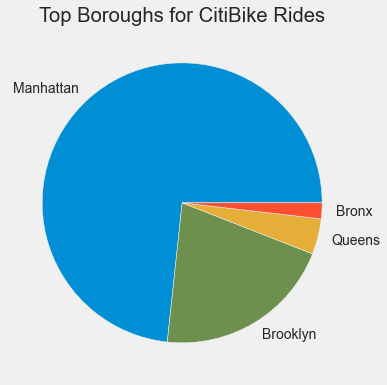

In [27]:
plt.figure(figsize=(6,6))

#plt.subplot(1, 2, 1)
plt.pie(CB_Ride_Place.start_boro.value_counts().head(4),
        labels = top_boros_start,
        colors = top_boros_start.map(boro_colors))
plt.title('Top Boroughs for CitiBike Rides')

# plt.subplot(1, 2, 2)
# plt.pie(CB_Ride_Place.start_boro.value_counts().head(4),
#         labels = top_boros_end,
#         colors = top_boros_end.map(boro_colors))
# plt.title('Top Boroughs for End Destinations')

plt.show()

Three-quarters of rides start and end in Manhattan. The majority of the remainder are in Brooklyn with very small participation in Queens and the Bronx.

In [20]:
CB_Ride_Place.groupby('start_boro')['end_boro'].value_counts(normalize = True)*100

start_boro  end_boro  
Bronx       Bronx         80.05
            Manhattan     19.54
            Queens         0.33
            Brooklyn       0.08
            New Jersey     0.00
Brooklyn    Brooklyn      85.98
            Manhattan     11.75
            Queens         2.26
            Bronx          0.01
            New Jersey     0.00
Manhattan   Manhattan     95.42
            Brooklyn       3.47
            Queens         0.61
            Bronx          0.50
            New Jersey     0.00
New Jersey  New Jersey   100.00
Queens      Queens        77.19
            Brooklyn      12.07
            Manhattan     10.61
            Bronx          0.13
Name: end_boro, dtype: float64

In [21]:
man_xtra = CB_Ride_Place[CB_Ride_Place.start_boro == 'Manhattan']['end_boro'].value_counts().head(4)
man_boro= CB_Ride_Place[CB_Ride_Place.start_boro == 'Manhattan']['end_boro'].value_counts().head(4).index
brk_xtra = CB_Ride_Place[CB_Ride_Place.start_boro == 'Brooklyn']['end_boro'].value_counts().head(4)
brk_boro= CB_Ride_Place[CB_Ride_Place.start_boro == 'Brooklyn']['end_boro'].value_counts().head(4).index
qns_xtra = CB_Ride_Place[CB_Ride_Place.start_boro == 'Queens']['end_boro'].value_counts().head(4)
qns_boro= CB_Ride_Place[CB_Ride_Place.start_boro == 'Queens']['end_boro'].value_counts().head(4).index
brx_xtra = CB_Ride_Place[CB_Ride_Place.start_boro == 'Bronx']['end_boro'].value_counts().head(4)
brx_boro= CB_Ride_Place[CB_Ride_Place.start_boro == 'Bronx']['end_boro'].value_counts().head(4).index

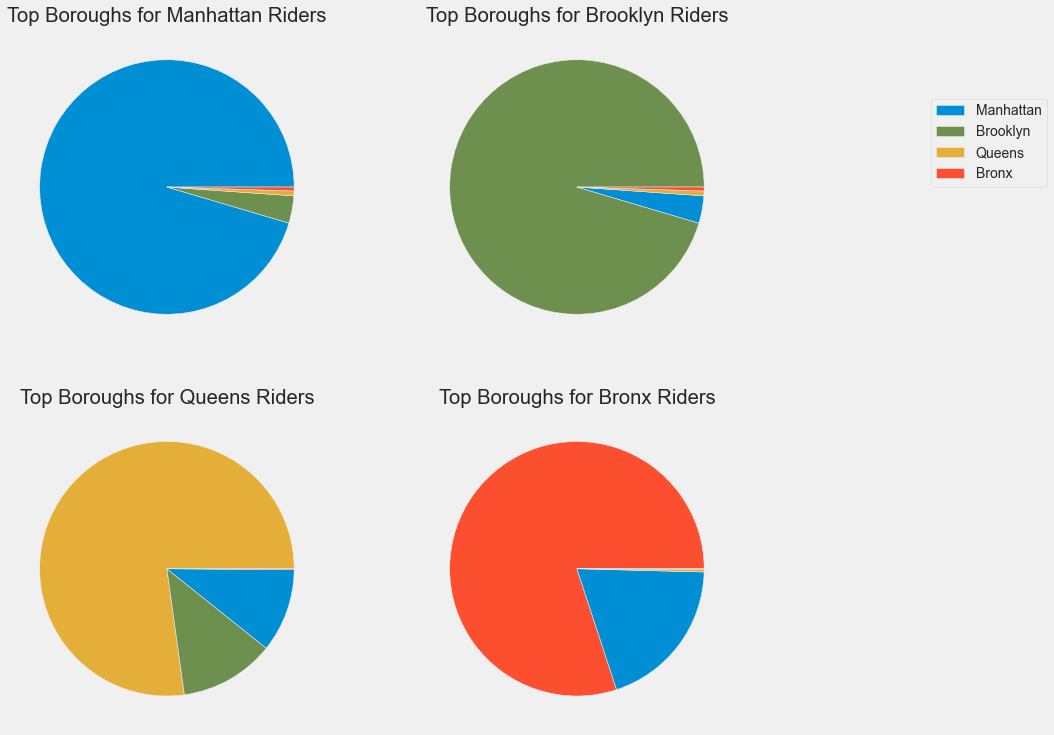

In [22]:
# 2 subplots in 2 rows and 2 columns
# From https://pythonguides.com/matplotlib-subplot-tutorial/
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))

# Top destinations for Manhattan riders
patches, texts = ax1.pie(man_xtra, colors = man_boro.map(boro_colors))
ax1.set_title('Top Boroughs for Manhattan Riders')

# Top destinations for Brooklyn riders
ax2.pie(man_xtra, colors = brk_boro.map(boro_colors))
ax2.set_title('Top Boroughs for Brooklyn Riders')

# Top destinations for Queens riders
ax3.pie(qns_xtra, colors = qns_boro.map(boro_colors))
ax3.set_title('Top Boroughs for Queens Riders')

# Top destinations for Bronx riders
ax4.pie(brx_xtra, colors = brx_boro.map(boro_colors))
ax4.set_title('Top Boroughs for Bronx Riders')

# Place legend
# Used this method due to difficulties implementing fig.legend:
# https://stackoverflow.com/questions/38443649/common-legend-for-all-the-pie-charts-using-matplotlib
plt.legend(patches, man_boro, bbox_to_anchor=(2, 2), prop={'size':14})

plt.show()

In [109]:
boro_dest = pd.DataFrame(CB_Ride_Place.groupby('start_boro')['end_boro'].value_counts())
boro_dest = boro_dest.reset_index("start_boro").rename(columns = {"end_boro":"num_riders"}).reset_index()

# From https://coderzcolumn.com/tutorials/data-science/how-to-plot-sankey-diagram-in-python-jupyter-notebook-holoviews-and-plotly#1.1
# Use plotly instead of holoview to support cyclic graphs, as explained here:
# https://stackoverflow.com/questions/68952152/sankey-diagrams-only-support-acyclic-graphs-error-message-i-get
hv.Sankey(boro_dest, kdims=["start_boro","end_boro"], vdims=["num_riders"])

RecursionError: Sankey diagrams only support acyclic graphs.

In [108]:
boro_dest.head()

,end_boro,start_boro,num_riders
0,Bronx,Bronx,396851
1,Manhattan,Bronx,96868
2,Queens,Bronx,1637
3,Brooklyn,Bronx,391
4,New Jersey,Bronx,3


In [ ]:
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
      thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label = CB_Ride_Place['start_boro'].dropna(axis=0, how='any'),
      color = CB_Ride_Place['start_boro'].map(boro_colors)
    ),
    link = dict(
      source = scottish_df['Source'].dropna(axis=0, how='any'),
      target = scottish_df['Target'].dropna(axis=0, how='any'),
      value = scottish_df['Value'].dropna(axis=0, how='any'),
      color = scottish_df['Link Color'].dropna(axis=0, how='any'),
  )
)

layout =  dict(
    title = "Scottish Referendum Voters who now want Independence",
    height = 772,
    font = dict(
      size = 10
    ),    
)

fig = dict(data=[data_trace], layout=layout)
py.iplot(fig, validate=False)

In general, almost all riders (95.5%) in Manhattan stay in Manhattan but a smidgeon (3.5%) do travel to Brooklyn. Most Brooklyn riders (86%) stay in their borough yet a small number (12%) do make it to Manhattan. Queens has almost a quarter of its riders split evenly traveling to Manhattan or Brooklyn. Finally, Bronx has almost a quarter of its ridership traveling to Manhattan.

Text(0.5, 1.0, 'Top Inter-Borough Bike Routes')

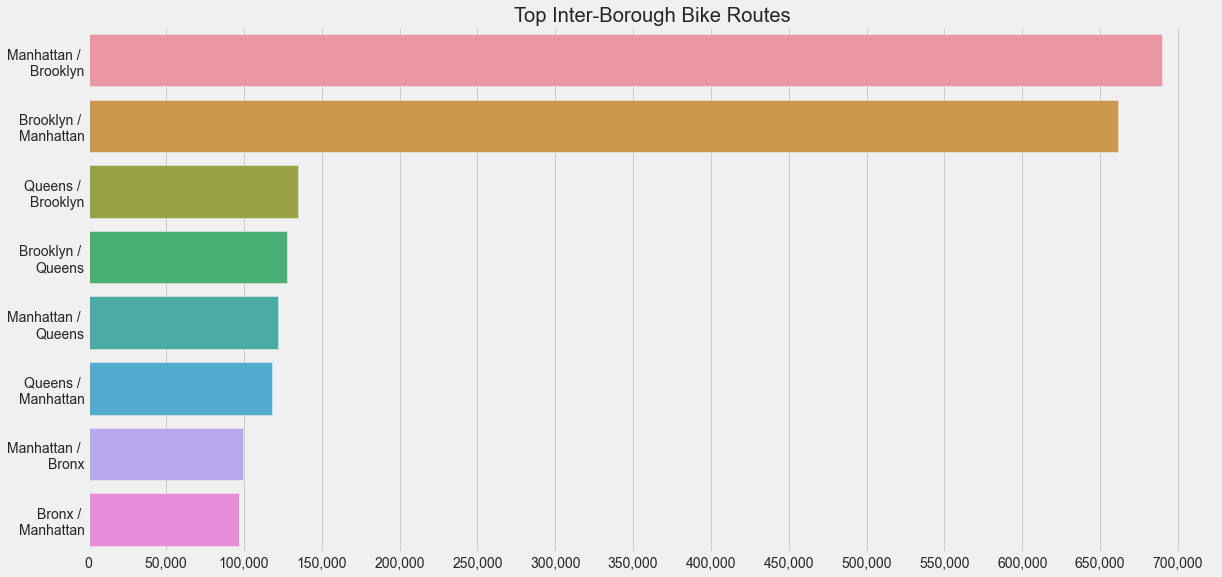

In [49]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
travels = CB_Ride_Place.value_counts(['start_boro','end_boro'])
trips = travels[[travels.index[i][0] != travels.index[i][1] for i in range(len(travels))]][:8]
trip_names = [trips.index[t][0] + ' / \n' + trips.index[t][1] for t in range(len(trips))]
trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,750000,50000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Inter-Borough Bike Routes')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

The largest inter-borough bike route is between Manhattan to Brooklyn, accounting for between 650,000 to 700,00 rides each way per year. Otherwise, routes between Brooklyn and Queens, Manhattan and Queens, and Manhattan and the Bronx are significant with roughly 100,000 to 125,000 rides each way per year between these pairings.

In [28]:
CB_Ride_Place.value_counts(['start_hood','start_boro'])[:10]

start_hood         start_boro
East Village       Manhattan     1427928
Chelsea            Manhattan     1396158
Upper West Side    Manhattan     1369118
Upper East Side    Manhattan     1362363
Williamsburg       Brooklyn      1256271
Lower East Side    Manhattan     1253125
Greenwich Village  Manhattan     1068552
Flatiron District  Manhattan     1038828
Midtown            Manhattan     1029581
Garment District   Manhattan      874267
dtype: int64

In [29]:
CB_Ride_Place.value_counts(['end_hood','end_boro'])[:10]

end_hood           end_boro 
East Village       Manhattan    1433990
Chelsea            Manhattan    1403587
Upper East Side    Manhattan    1351890
Upper West Side    Manhattan    1330007
Williamsburg       Brooklyn     1274330
Lower East Side    Manhattan    1270384
Greenwich Village  Manhattan    1078268
Flatiron District  Manhattan    1039473
Midtown            Manhattan    1022648
Garment District   Manhattan     866247
dtype: int64

Text(0.5, 1.0, 'Top Neighborhoods for CitiBike Rides')

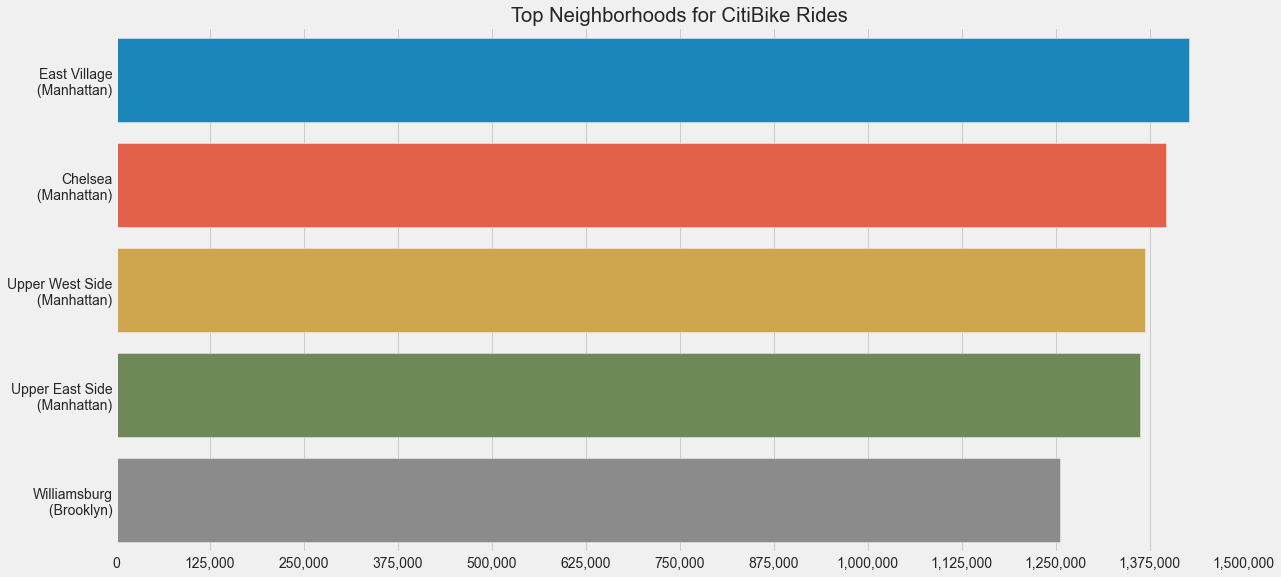

In [31]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = CB_Ride_Place.value_counts(['start_hood','start_boro'])[:5]
trip_names = [trips.index[t][0] + '\n (' + trips.index[t][1] + ')' for t in range(len(trips))]
trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,1625000,125000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Neighborhoods for CitiBike Rides')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

In [33]:
man_hood = CB_Ride_Place[CB_Ride_Place.start_boro == 'Manhattan']['start_hood'].value_counts()[:5]
brk_hood = CB_Ride_Place[CB_Ride_Place.start_boro == 'Brooklyn']['start_hood'].value_counts()[:5]
qns_hood = CB_Ride_Place[CB_Ride_Place.start_boro == 'Queens']['start_hood'].value_counts()[:5]
brx_hood = CB_Ride_Place[CB_Ride_Place.start_boro == 'Bronx']['start_hood'].value_counts()[:5]

Text(0.5, 1.0, 'Top Neighborhoods for CitiBike Rides (Manhattan)')

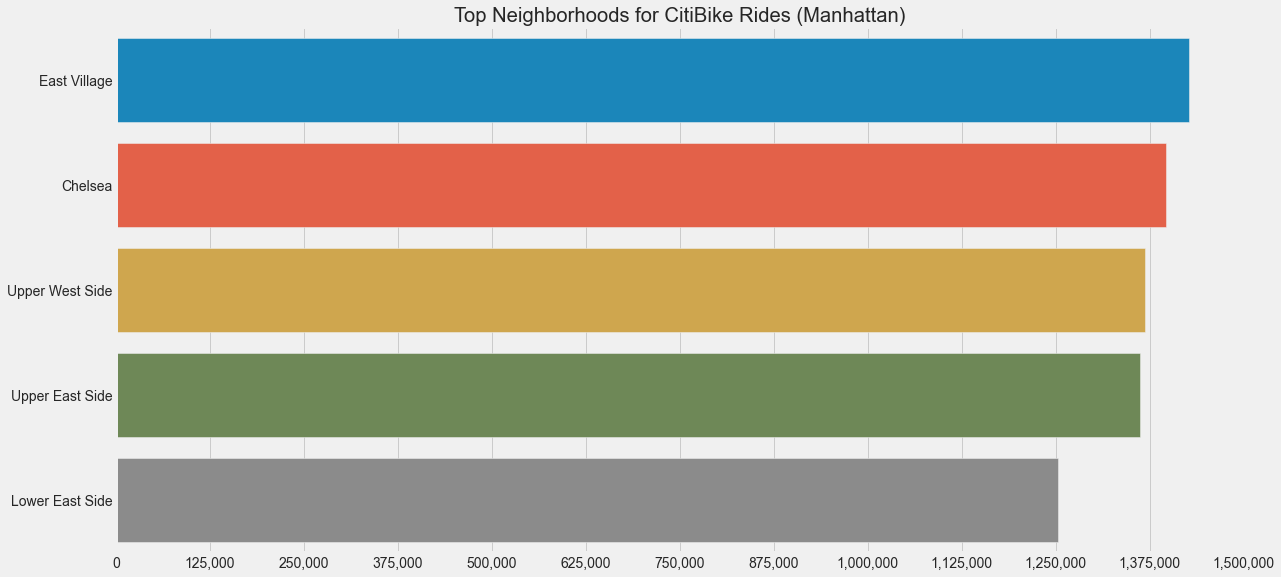

In [35]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = man_hood
trip_names = [trips.index[t] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,1625000,125000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Neighborhoods for CitiBike Rides (Manhattan)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Neighborhoods for CitiBike Rides (Brooklyn)')

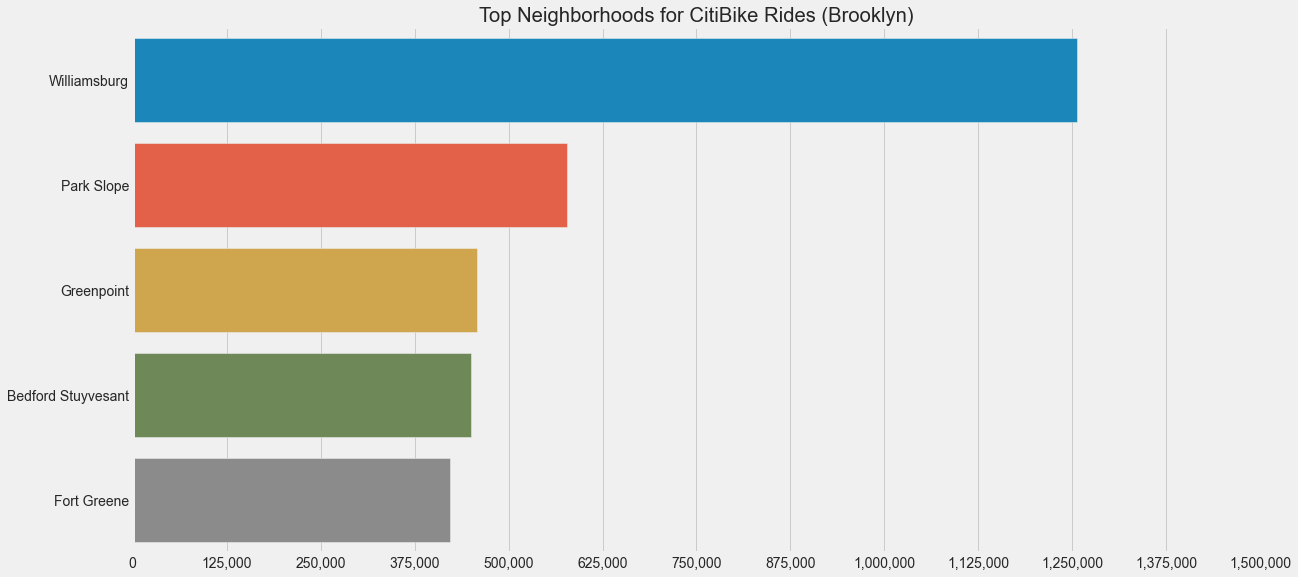

In [36]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = brk_hood
trip_names = [trips.index[t] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,1625000,125000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Neighborhoods for CitiBike Rides (Brooklyn)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Neighborhoods for CitiBike Rides (Queens)')

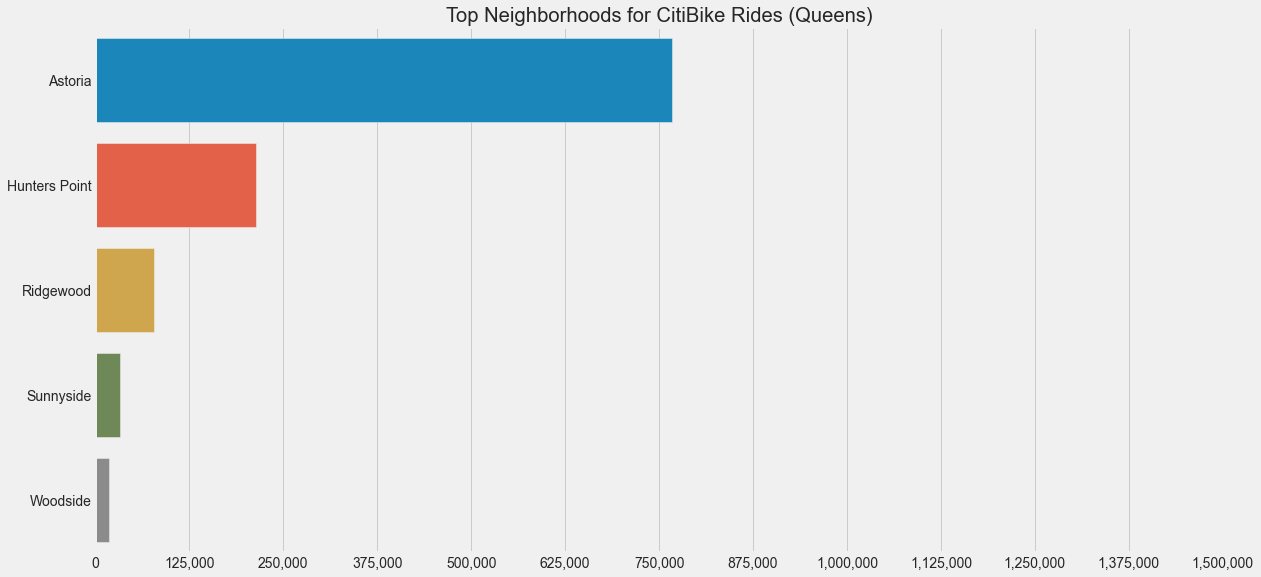

In [37]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = qns_hood
trip_names = [trips.index[t] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,1625000,125000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Neighborhoods for CitiBike Rides (Queens)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Neighborhoods for CitiBike Rides (Bronx)')

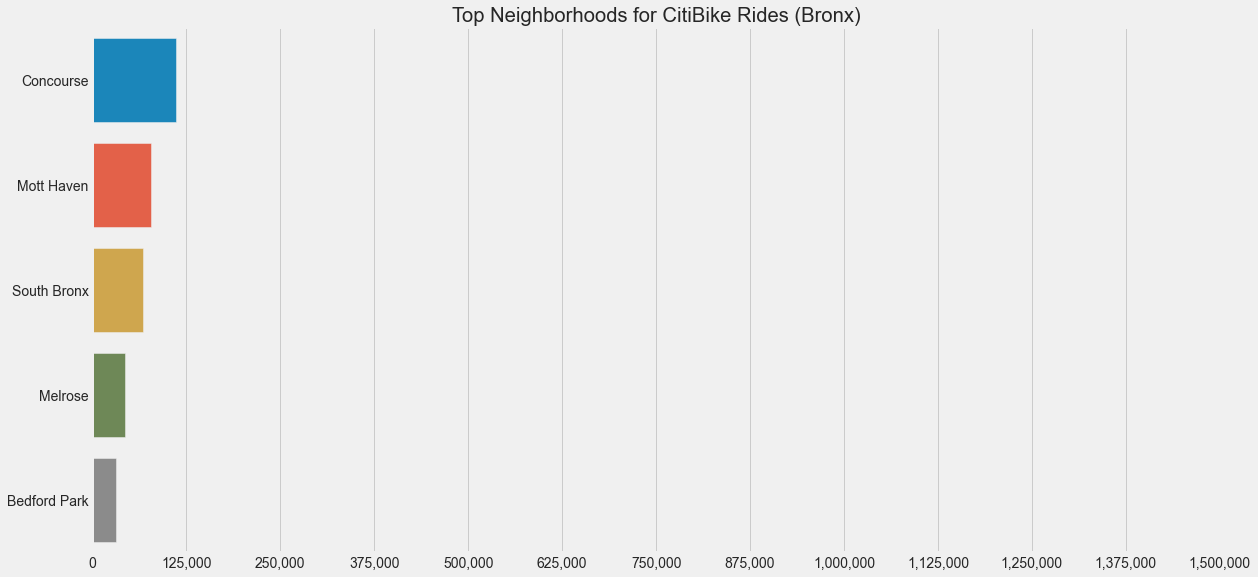

In [38]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = brx_hood
trip_names = [trips.index[t] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,1625000,125000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Neighborhoods for CitiBike Rides (Bronx)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

In [48]:
CB_Ride_Place.value_counts(['start_hood','start_boro','end_hood','end_boro'])[:10]

start_hood       start_boro  end_hood         end_boro 
Astoria          Queens      Astoria          Queens       579806
Williamsburg     Brooklyn    Williamsburg     Brooklyn     554574
Upper East Side  Manhattan   Upper East Side  Manhattan    535652
Upper West Side  Manhattan   Upper West Side  Manhattan    508828
East Village     Manhattan   East Village     Manhattan    375896
Lower East Side  Manhattan   Lower East Side  Manhattan    352429
Chelsea          Manhattan   Chelsea          Manhattan    345556
Harlem           Manhattan   Harlem           Manhattan    219904
Park Slope       Brooklyn    Park Slope       Brooklyn     202494
Williamsburg     Brooklyn    Greenpoint       Brooklyn     199758
dtype: int64

Text(0.5, 1.0, 'Top Neighborhood CitiBike Routes')

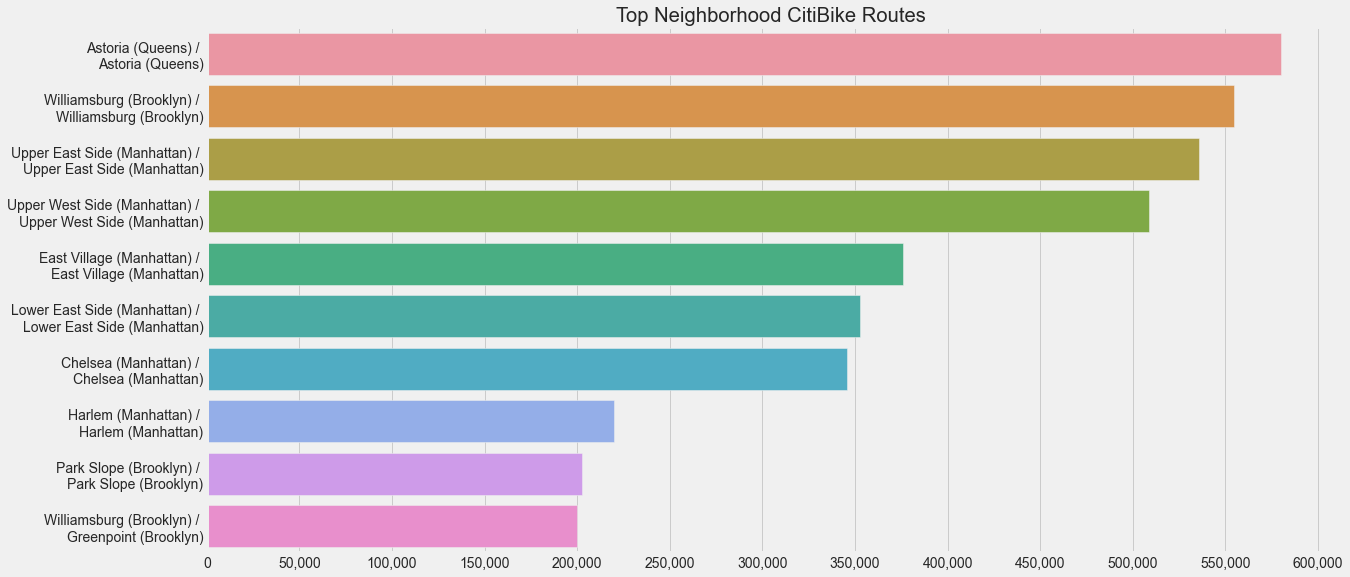

In [50]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = CB_Ride_Place.value_counts(['start_hood','start_boro','end_hood','end_boro'])[:10]
trip_names = [trips.index[t][0] + ' (' + trips.index[t][1] + ') / \n' 
              + trips.index[t][2] + ' (' + trips.index[t][3] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,650000,50000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Neighborhood CitiBike Routes')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Cross-Neighborhood Bike Routes')

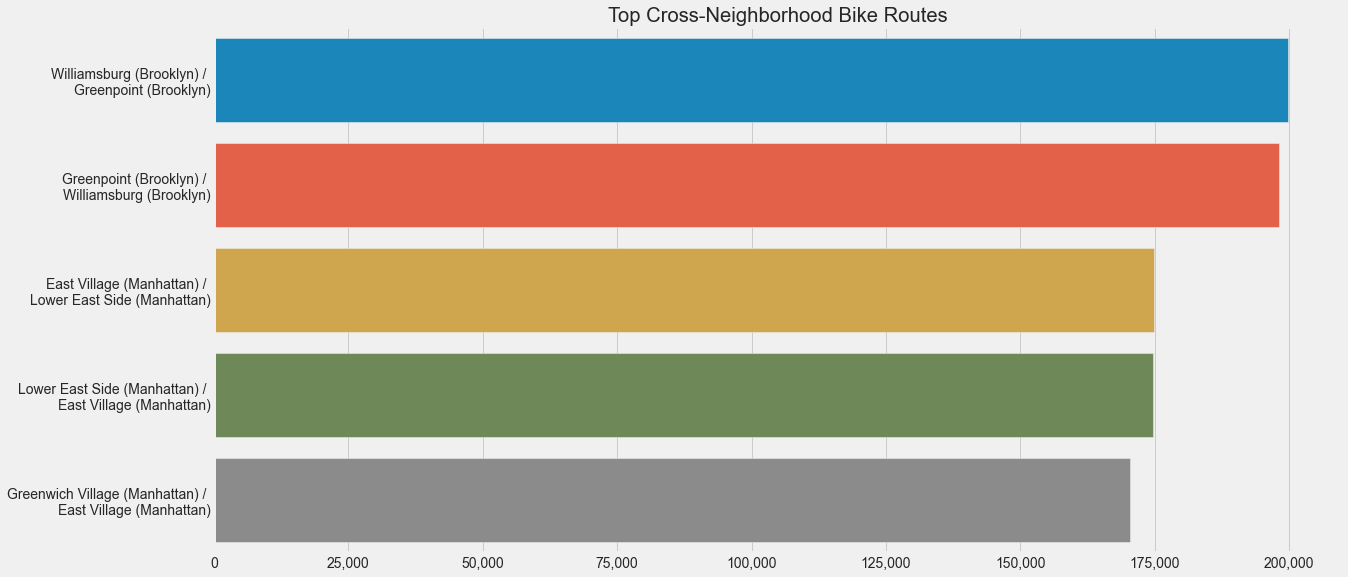

In [71]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
travels = CB_Ride_Place.value_counts(['start_hood','start_boro','end_hood','end_boro'])
trips = travels[[travels.index[i][0] != travels.index[i][2] for i in range(len(travels))]][:5]
trip_names = [trips.index[t][0] + ' (' + trips.index[t][1] + ') / \n' 
              + trips.index[t][2] + ' (' + trips.index[t][3] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,225000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Cross-Neighborhood Bike Routes')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

In [65]:
man_hoods = CB_Ride_Place[CB_Ride_Place.start_boro == 'Manhattan'] \
.value_counts(['start_hood','start_boro','end_hood','end_boro'])
brk_hoods = CB_Ride_Place[CB_Ride_Place.start_boro == 'Brooklyn'] \
.value_counts(['start_hood','start_boro','end_hood','end_boro'])
qns_hoods = CB_Ride_Place[CB_Ride_Place.start_boro == 'Queens'] \
.value_counts(['start_hood','start_boro','end_hood','end_boro'])
brx_hoods = CB_Ride_Place[CB_Ride_Place.start_boro == 'Bronx'] \
.value_counts(['start_hood','start_boro','end_hood','end_boro'])

Text(0.5, 1.0, 'Top Cross-Neighborhood Bike Routes (Manhattan)')

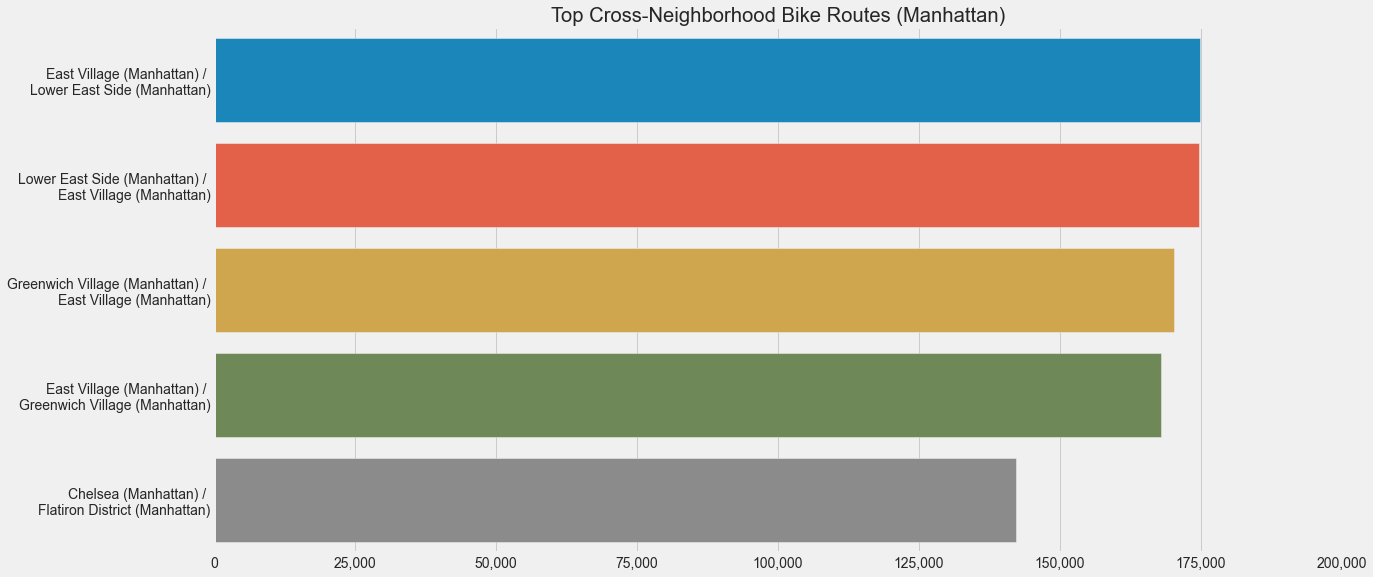

In [72]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
travels = man_hoods
trips = travels[[travels.index[i][0] != travels.index[i][2] for i in range(len(travels))]][:5]
trip_names = [trips.index[t][0] + ' (' + trips.index[t][1] + ') / \n' 
              + trips.index[t][2] + ' (' + trips.index[t][3] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,225000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Cross-Neighborhood Bike Routes (Manhattan)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Cross-Neighborhood Bike Routes (Brooklyn)')

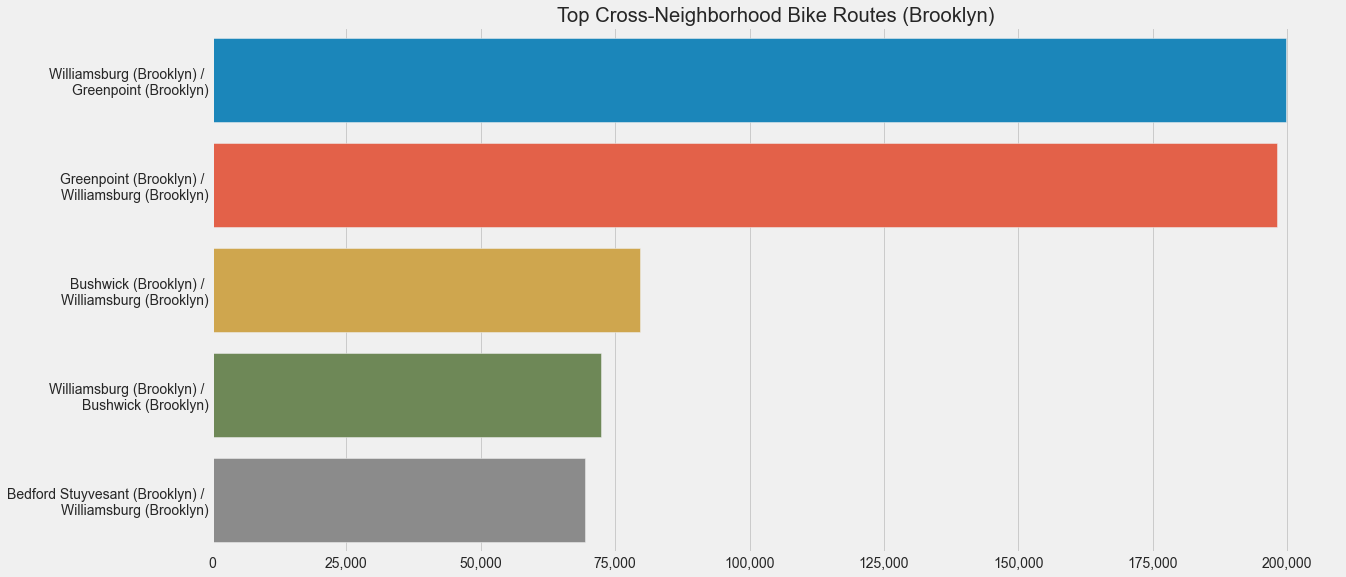

In [73]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
travels = brk_hoods
trips = travels[[travels.index[i][0] != travels.index[i][2] for i in range(len(travels))]][:5]
trip_names = [trips.index[t][0] + ' (' + trips.index[t][1] + ') / \n' 
              + trips.index[t][2] + ' (' + trips.index[t][3] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,225000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Cross-Neighborhood Bike Routes (Brooklyn)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Cross-Neighborhood Bike Routes (Queens)')

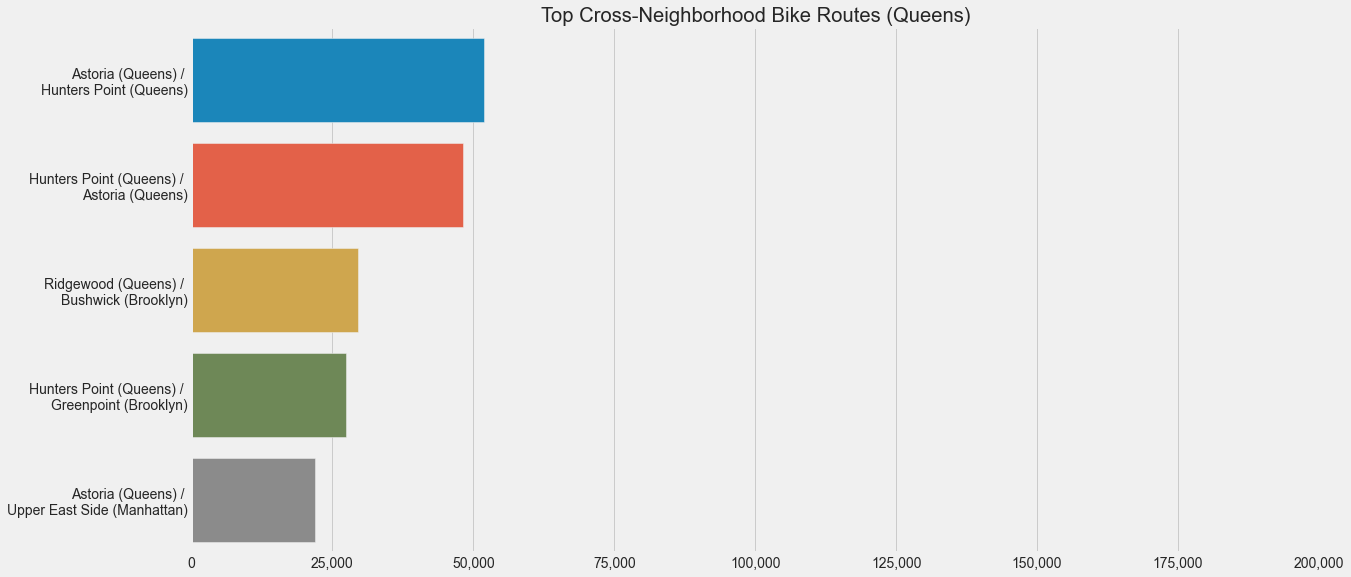

In [74]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
travels = qns_hoods
trips = travels[[travels.index[i][0] != travels.index[i][2] for i in range(len(travels))]][:5]
trip_names = [trips.index[t][0] + ' (' + trips.index[t][1] + ') / \n' 
              + trips.index[t][2] + ' (' + trips.index[t][3] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,225000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Cross-Neighborhood Bike Routes (Queens)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Top Cross-Neighborhood Bike Routes (Bronx)')

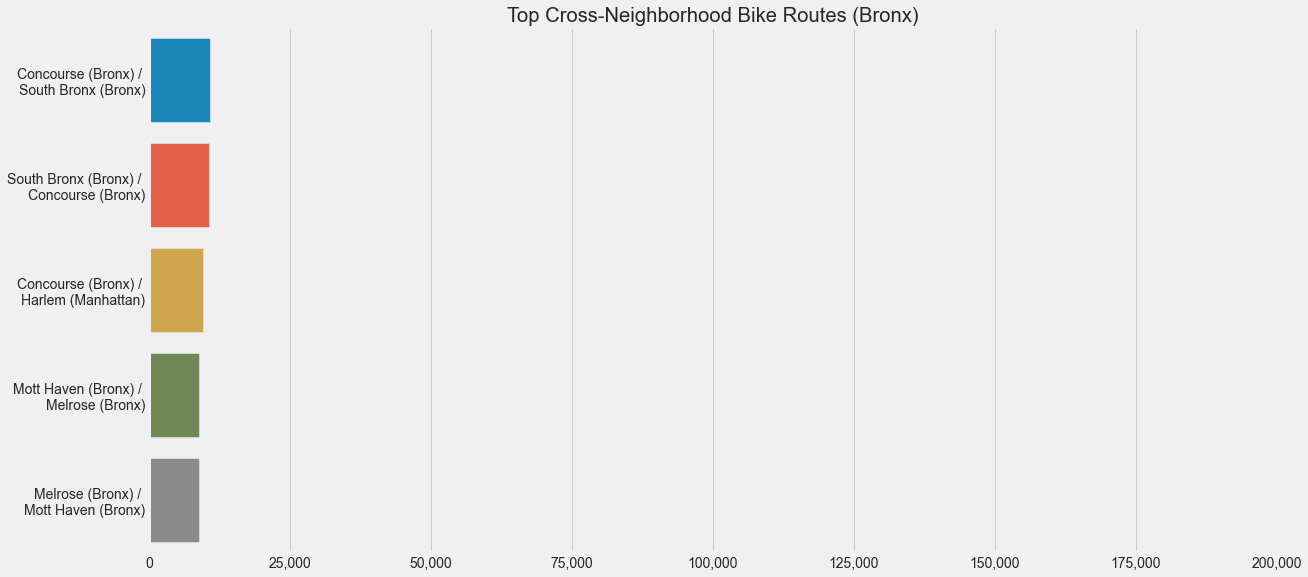

In [98]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
travels = brx_hoods
trips = travels[[travels.index[i][0] != travels.index[i][2] for i in range(len(travels))]][:5]
trip_names = [trips.index[t][0] + ' (' + trips.index[t][1] + ') / \n' 
              + trips.index[t][2] + ' (' + trips.index[t][3] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,225000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Top Cross-Neighborhood Bike Routes (Bronx)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

In [78]:
CB_Ride_Place.value_counts(['start_station_name','start_hood','start_boro'])[:20]

start_station_name        start_hood         start_boro
W 21 St & 6 Ave           Chelsea            Manhattan     128058
E 17 St & Broadway        Flatiron District  Manhattan     115561
West St & Chambers St     Battery Park       Manhattan     107199
1 Ave & E 68 St           Upper East Side    Manhattan     104395
Broadway & E 14 St        Greenwich Village  Manhattan      99976
6 Ave & W 33 St           Garment District   Manhattan      98626
Broadway & W 25 St        Flatiron District  Manhattan      98614
Cleveland Pl & Spring St  Little Italy       Manhattan      98112
University Pl & E 14 St   Greenwich Village  Manhattan      92734
Carmine St & 6 Ave        Greenwich Village  Manhattan      90170
West St & Liberty St      Battery Park       Manhattan      88869
E 33 St & 1 Ave           Gramercy           Manhattan      88239
9 Ave & W 22 St           Chelsea            Manhattan      87520
Grand St & Elizabeth St   Little Italy       Manhattan      85915
E 13 St & Avenue A  

In [79]:
CB_Ride_Place.value_counts(['end_station_name','end_hood','end_boro'])[:20]

end_station_name            end_hood           end_boro 
W 21 St & 6 Ave             Chelsea            Manhattan    129117
E 17 St & Broadway          Flatiron District  Manhattan    117419
West St & Chambers St       Battery Park       Manhattan    108217
1 Ave & E 68 St             Upper East Side    Manhattan    105064
Broadway & E 14 St          Greenwich Village  Manhattan     99584
6 Ave & W 33 St             Garment District   Manhattan     99150
Broadway & W 25 St          Flatiron District  Manhattan     98955
Cleveland Pl & Spring St    Little Italy       Manhattan     98843
University Pl & E 14 St     Greenwich Village  Manhattan     94059
Carmine St & 6 Ave          Greenwich Village  Manhattan     90873
West St & Liberty St        Battery Park       Manhattan     89604
E 33 St & 1 Ave             Gramercy           Manhattan     88424
9 Ave & W 22 St             Chelsea            Manhattan     88242
Grand St & Elizabeth St     Little Italy       Manhattan     87026
E 13 

Text(0.5, 1.0, 'Most Active CitiBike Stations')

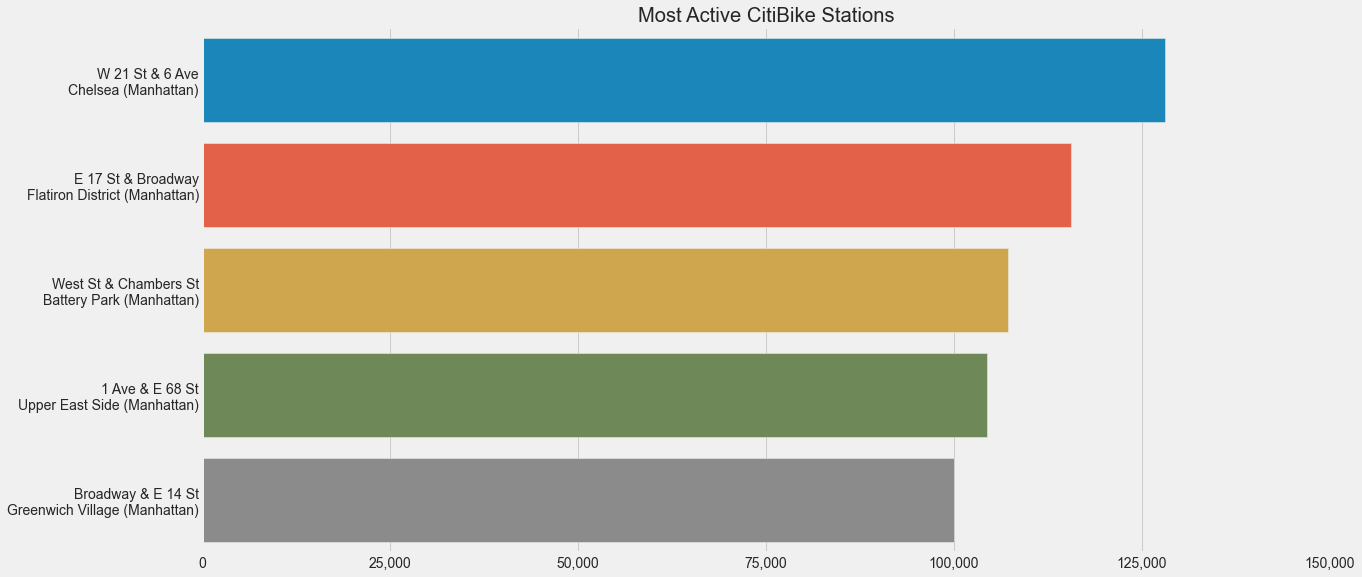

In [82]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = CB_Ride_Place.value_counts(['start_station_name','start_hood','start_boro'])[:5]
trip_names = [trips.index[t][0] + '\n' 
              + trips.index[t][1] + ' (' + trips.index[t][2] + ')' for t in range(len(trips))]
# trip_colors = [trips.index[t][1] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,175000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Most Active CitiBike Stations')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

In [83]:
brk_stat = CB_Ride_Place[CB_Ride_Place.start_boro == 'Brooklyn']['start_station_name'].value_counts()[:5]
qns_stat = CB_Ride_Place[CB_Ride_Place.start_boro == 'Queens']['start_station_name'].value_counts()[:5]
brx_stat= CB_Ride_Place[CB_Ride_Place.start_boro == 'Bronx']['start_station_name'].value_counts()[:5]

Text(0.5, 1.0, 'Most Active CitiBike Stations (Brooklyn)')

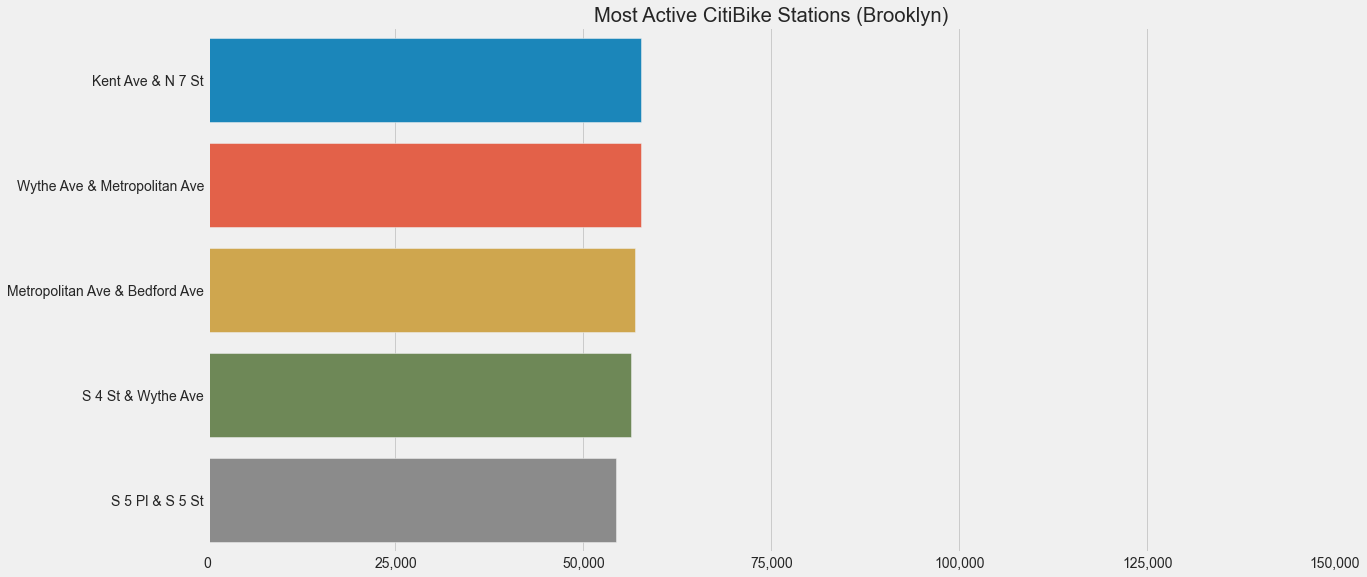

In [84]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = brk_stat
trip_names = [trips.index[t][0] + '\n' 
              + trips.index[t][1] + ' (' + trips.index[t][2] + ')' for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,175000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Most Active CitiBike Stations (Brooklyn)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Most Active CitiBike Stations (Queens)')

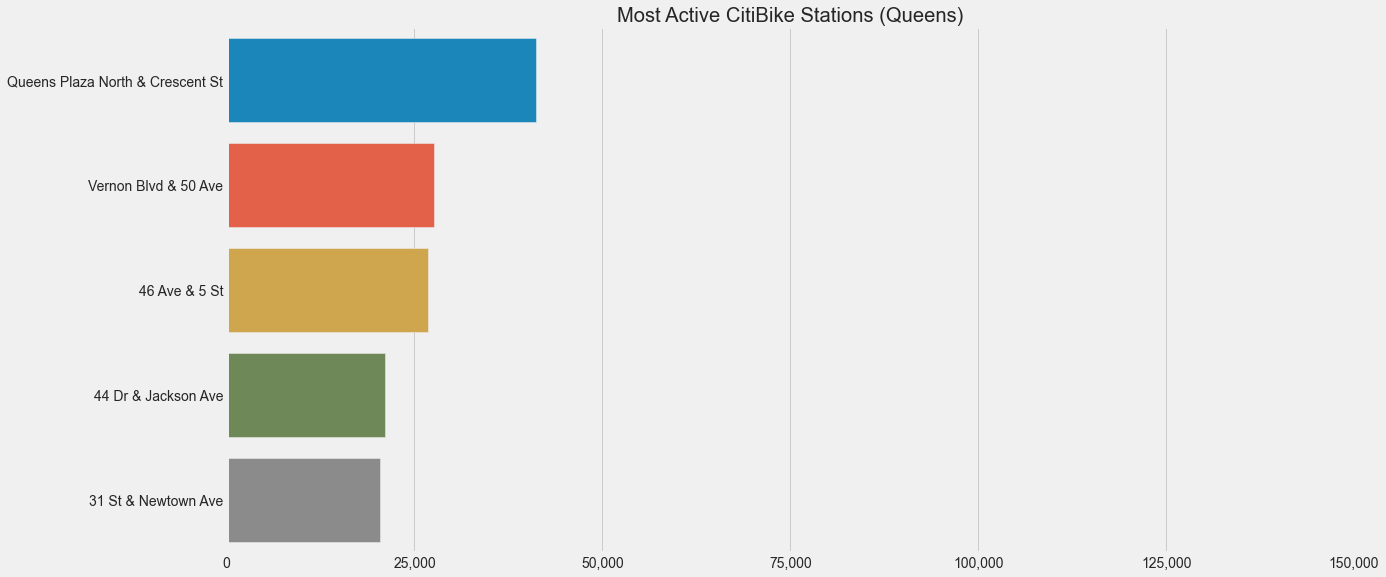

In [85]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = qns_stat
trip_names = [trips.index[t] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,175000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Most Active CitiBike Stations (Queens)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)

Text(0.5, 1.0, 'Most Active CitiBike Stations (Bronx)')

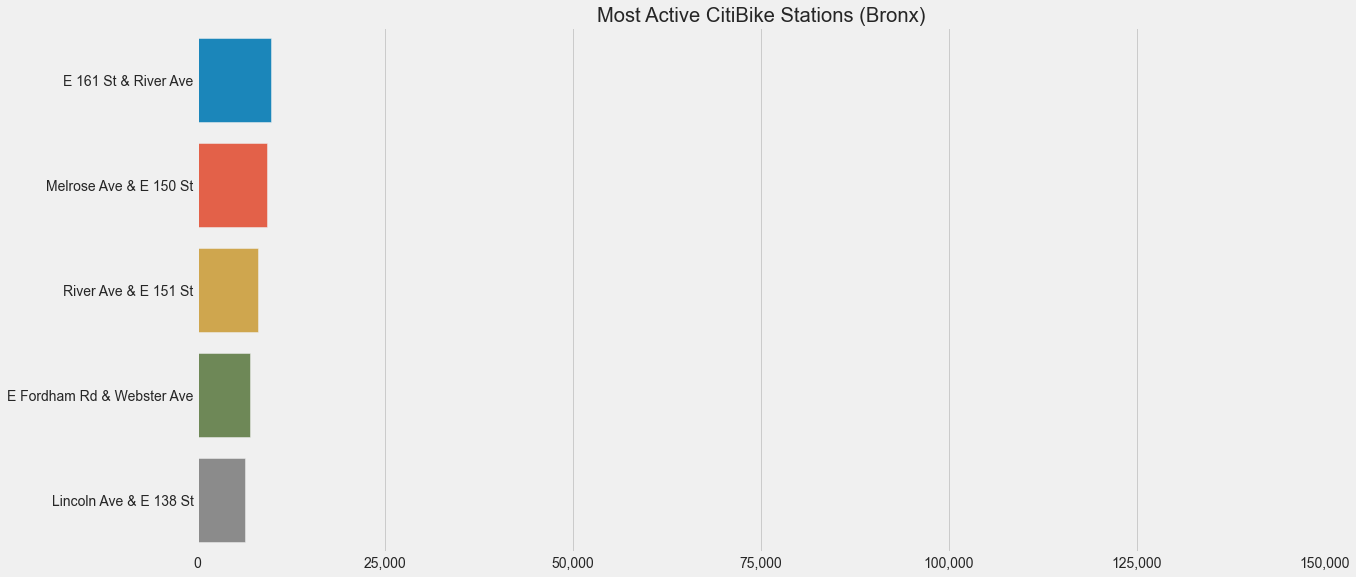

In [86]:
# Seaborn Horizontal Bar Plot
# From https://towardsdatascience.com/reverse-geocoding-with-nyc-bike-share-data-cdef427987f8
# Seaborn Color Palette Control
# From https://stackoverflow.com/questions/68616781/customizing-the-hue-colors-used-in-seaborn-barplot
trips = brx_stat
trip_names = [trips.index[t] for t in range(len(trips))]
plt.figure(figsize=(18,9))
g = sns.barplot(x = list(trips.values), y = trip_names, orient="h")

# Plot formatting
g.set_xticks(list(range(0,175000,25000)))
g.xaxis.set_major_formatter(StrMethodFormatter('{x:,}'))
plt.title('Most Active CitiBike Stations (Bronx)')
# g = sns.barplot(x = list(trips.values), y = trip_names, orient="h",
#            hue = trip_colors, palette = boro_colors)